Enter path to the folder:  C:\ARMADA


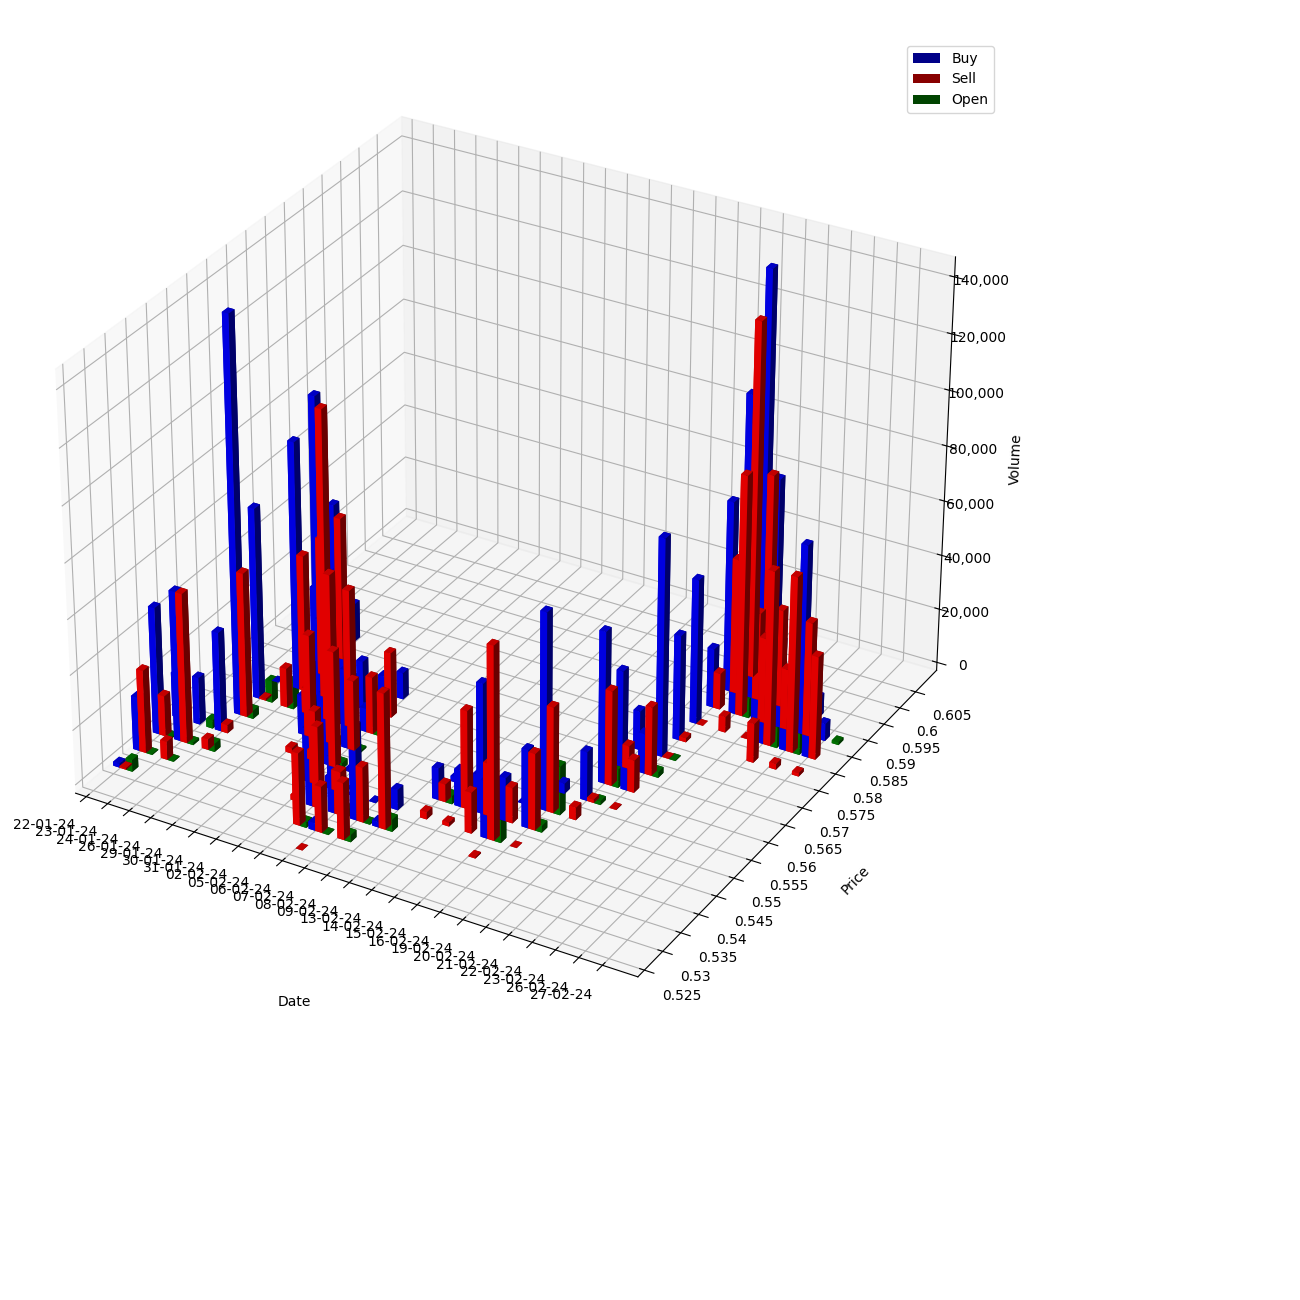

In [1]:
#!/usr/bin/env python
%matplotlib ipympl
from collections import OrderedDict
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import csv
import os

if __name__ == '__main__':
    path = input("Enter path to the folder: ")
    #path = r"C:\Users\MU036985\OneDrive\Desktop\StockAnalysis"
    os.chdir(path)
    buyDataDictionary= {}
    sellDataDictionary={}
    openDataDictionary={}
    buyUniquePriceGlobalSet = set()
    sellUniquePriceGlobalSet = set()
    openUniquePriceGlobalSet = set()
    for file in os.listdir():        
        dateString = file.removesuffix(".csv")
        dateObject = datetime.strptime(dateString, '%d-%m-%Y').date()
        with open(r"{}\{}".format(path, file), "r", encoding='utf-8') as csv_file:
            rows = csv.DictReader(csv_file, delimiter=",")
            buyPriceVolumeDictionary = {}
            sellPriceVolumeDictionary = {}
            openPriceVolumeDictionary = {}
            buyUniquePriceSet = set()
            sellUniquePriceSet = set()
            openUniquePriceSet = set()
            for row in rows:  
                if(row["Type"] == 'B'):
                    if(buyUniquePriceSet.isdisjoint({float(row["Price"])})):
                        buyUniquePriceSet.add(float(row["Price"]))
                        buyPriceVolumeDictionary[float(row["Price"])] = 0
                        buyPriceVolumeDictionary[float(row["Price"])] = buyPriceVolumeDictionary[float(row["Price"])] + float(row["Vol"])
                    else:
                        buyPriceVolumeDictionary[float(row["Price"])] = buyPriceVolumeDictionary[float(row["Price"])] + float(row["Vol"])
                elif (row["Type"] == 'S'):
                    if(sellUniquePriceSet.isdisjoint({float(row["Price"])})):
                        sellUniquePriceSet.add(float(row["Price"]))
                        sellPriceVolumeDictionary[float(row["Price"])] = 0
                        sellPriceVolumeDictionary[float(row["Price"])] = sellPriceVolumeDictionary[float(row["Price"])] + float(row["Vol"])
                    else:
                        sellPriceVolumeDictionary[float(row["Price"])] = sellPriceVolumeDictionary[float(row["Price"])] + float(row["Vol"])
                elif(row["Type"] == 'O'):
                    if(openUniquePriceSet.isdisjoint({float(row["Price"])})):
                        openUniquePriceSet.add(float(row["Price"]))
                        openPriceVolumeDictionary[float(row["Price"])] = 0
                        openPriceVolumeDictionary[float(row["Price"])] = openPriceVolumeDictionary[float(row["Price"])] + float(row["Vol"])
                    else:
                        openPriceVolumeDictionary[float(row["Price"])] = openPriceVolumeDictionary[float(row["Price"])] + float(row["Vol"])
                
            buyDataDictionary[dateObject] = buyPriceVolumeDictionary
            sellDataDictionary[dateObject] = sellPriceVolumeDictionary
            openDataDictionary[dateObject] = openPriceVolumeDictionary
            buyUniquePriceGlobalSet.update(buyUniquePriceSet)
            sellUniquePriceGlobalSet.update(sellUniquePriceSet)
            openUniquePriceGlobalSet.update(openUniquePriceSet)
    fig = plt.figure(figsize=(13, 13))
    ax1 = fig.add_subplot(111, projection='3d')

    datePosBuy = []
    datePosSell = []
    datePosOpen = []
    pricePosBuy = []
    pricePosSell = []
    pricePosOpen = []
    volumePosBuy = []
    volumePosSell = []
    volumePosOpen = []
    dDateBuy = []
    dDateSell = []
    dDateOpen = []
    dPriceBuy = []
    dPriceSell = []
    dPriceOpen = []
    dVolumeBuy = []
    dVolumeSell = []
    dVolumeOpen = []
    allDate = set()
    allDate.update(buyDataDictionary.keys())
    allDate.update(sellDataDictionary.keys())
    allDate.update(openDataDictionary.keys())
    dateNumberMaping = {}
    for x, y in [(x, y) for x, y in zip(sorted(allDate), np.arange(len(allDate)))]:
        dateNumberMaping [x] = y
    
    allPrice = set()
    allPrice.update(buyUniquePriceGlobalSet)
    allPrice.update(sellUniquePriceGlobalSet)
    allPrice.update(openUniquePriceGlobalSet)
    priceNumberMaping = {}
    for x, y in [(x, y) for x, y in zip(sorted(allPrice), np.arange(len(allPrice)))]:
        priceNumberMaping [x] = y
    
    for aDate in buyDataDictionary.keys():
        #orderedPriceBuyDataDictionary = OrderedDict(sorted(orderedBuyDataDictionary[aDate].items()))
        for aPrice in buyDataDictionary[aDate]:
            datePosBuy.append(dateNumberMaping[aDate])
            pricePosBuy.append(priceNumberMaping[aPrice])
            volumePosBuy.append(0)
            dDateBuy.append(0.3)
            dPriceBuy.append(0.3)
            dVolumeBuy.append(float(buyDataDictionary[aDate][aPrice])) 
            #ax1.text(dateNumberMaping[aDate], priceNumberMaping[aPrice], float(buyDataDictionary[aDate][aPrice]) + 1000, float(buyDataDictionary[aDate][aPrice]), color='black')
        

    for sDate in sellDataDictionary.keys():
        #orderedPriceBuyDataDictionary = OrderedDict(sorted(orderedBuyDataDictionary[aDate].items()))
        for sPrice in sellDataDictionary[sDate]:
            datePosSell.append(dateNumberMaping[sDate] + 0.3)
            pricePosSell.append(priceNumberMaping[sPrice])
            volumePosSell.append(0)
            dDateSell.append(0.3)
            dPriceSell.append(0.3)
            dVolumeSell.append(float(sellDataDictionary[sDate][sPrice])) 
            #ax1.text(dateNumberMaping[sDate] + 0.3, priceNumberMaping[sPrice], float(sellDataDictionary[sDate][sPrice]) + 1000, float(sellDataDictionary[sDate][sPrice]), color='black')

    for oDate in openDataDictionary.keys():
        for oPrice in openDataDictionary[oDate]:
            datePosOpen.append(dateNumberMaping[oDate] + 0.6)
            pricePosOpen.append(priceNumberMaping[oPrice])
            volumePosOpen.append(0)
            dDateOpen.append(0.3)
            dPriceOpen.append(0.3)
            dVolumeOpen.append(float(openDataDictionary[oDate][oPrice])) 
            #ax1.text(dateNumberMaping[oDate] + 0.6, priceNumberMaping[oPrice], float(openDataDictionary[oDate][oPrice]) + 1000, float(openDataDictionary[oDate][oPrice]), color='black')
    #plotting
    ax1.bar3d(datePosBuy, pricePosBuy, volumePosBuy, dDateBuy, dPriceBuy, dVolumeBuy, color='blue', label='Buy')
    ax1.bar3d(datePosSell, pricePosSell, volumePosSell, dDateSell, dPriceSell, dVolumeSell, color='red', label='Sell')
    ax1.bar3d(datePosOpen, pricePosOpen, volumePosOpen, dDateOpen, dPriceOpen, dVolumeOpen, color='green', label='Open')
    ax1.set_xticks(list(dateNumberMaping.values()), [x.strftime('%d-%m-%y') for x  in dateNumberMaping.keys()], ha='right')
    ax1.set_yticks(list(priceNumberMaping.values()), priceNumberMaping.keys(), ha='left')
    #ax1.set_xticklabels(datePos)
    #ax1.set_yticklabels(pricePos)
    #ax.set_yticklabels(labels,rotation=-15, verticalalignment='baseline', horizontalalignment='left')
    ax1.set_ylim3d(priceNumberMaping[min(allPrice)], priceNumberMaping[max(allPrice)]+1)
    ax1.set_xlim3d(dateNumberMaping[min(allDate)], dateNumberMaping[max(allDate)]+1)
    ax1.set_xlabel('Date', labelpad=40)
    ax1.set_ylabel('Price', labelpad=20)
    ax1.set_zlabel('Volume', labelpad=10)
    ax1.legend()
    ax1.zaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax1.set_box_aspect(aspect = (4,4,3))
    chartBox = ax1.get_position() 
    ax1.set_position([0, 0.2, chartBox.width, chartBox.height]) 
    plt.show()
   
    
        






 





